In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Import library**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import nltk, re
from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# **Load data**

In [3]:
!git clone https://github.com/tanvirrazin/Machine-Learning-A-Z-Udemy/

fatal: destination path 'Machine-Learning-A-Z-Udemy' already exists and is not an empty directory.


In [4]:
%cd /content/Machine-Learning-A-Z-Udemy
%ls -l

/content/Machine-Learning-A-Z-Udemy
total 48
drwxr-xr-x 2 root root 4096 Nov 26 13:10 data_files/
drwxr-xr-x 4 root root 4096 Nov 26 13:10 part_10-model-selection-and-boosting/
drwxr-xr-x 2 root root 4096 Nov 26 13:10 part_1-data-preprocessing/
drwxr-xr-x 8 root root 4096 Nov 26 13:10 part_2-regression/
drwxr-xr-x 9 root root 4096 Nov 26 13:10 part_3-classification/
drwxr-xr-x 4 root root 4096 Nov 26 13:10 part_4-clustering/
drwxr-xr-x 4 root root 4096 Nov 26 13:10 part_5-association-rule/
drwxr-xr-x 4 root root 4096 Nov 26 13:10 part_6-re-inforcement-learning/
drwxr-xr-x 2 root root 4096 Nov 26 13:10 part_7-natural-language-processing/
drwxr-xr-x 4 root root 4096 Nov 26 13:10 part_8-deep-learning/
drwxr-xr-x 5 root root 4096 Nov 26 13:10 part_9-dimentionality-reduction/
-rw-r--r-- 1 root root   29 Nov 26 13:10 README.md


In [5]:
dataset = pd.read_csv('data_files/Restaurant_Reviews.tsv', delimiter = '\t', quoting = 3)
dataset

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


# **Data preprocessing**

In [6]:
nltk.download('stopwords')
stop_word_list = set(stopwords.words('english'))
corpus = []
for i in range(len(dataset)):
    dataset['Review'][i] = " ".join([word for word in re.sub('[^A-Za-z0-9]+', ' ', dataset['Review'][i].lower()).split() if word not in stop_word_list])
    corpus.append(dataset['Review'][i])
corpus

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


['wow loved place',
 'crust good',
 'tasty texture nasty',
 'stopped late may bank holiday rick steve recommendation loved',
 'selection menu great prices',
 'getting angry want damn pho',
 'honeslty taste fresh',
 'potatoes like rubber could tell made ahead time kept warmer',
 'fries great',
 'great touch',
 'service prompt',
 'would go back',
 'cashier care ever say still ended wayyy overpriced',
 'tried cape cod ravoli chicken cranberry mmmm',
 'disgusted pretty sure human hair',
 'shocked signs indicate cash',
 'highly recommended',
 'waitress little slow service',
 'place worth time let alone vegas',
 'like',
 'burrittos blah',
 'food amazing',
 'service also cute',
 'could care less interior beautiful',
 'performed',
 'right red velvet cake ohhh stuff good',
 'never brought salad asked',
 'hole wall great mexican street tacos friendly staff',
 'took hour get food 4 tables restaurant food luke warm sever running around like totally overwhelmed',
 'worst salmon sashimi',
 'also com

# **Creating Bags of Words model**

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=100)
X = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:, -1].values

# **Data splitting**

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(800, 100) (200, 100) (800,) (200,)


# **Train on Naive Bayes model**

In [9]:
from sklearn.naive_bayes import GaussianNB

In [10]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

# **Test model**

In [11]:
y_pred = model.predict(X_test)

# **Confusion matrix**

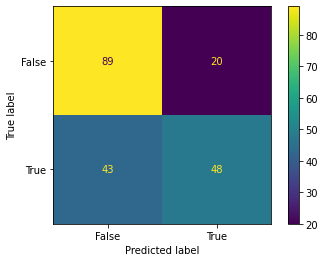

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
confusion_matrix = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()